In [ ]:
!pip install oandapyV20

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for oandapyV20: filename=oandapyV20-0.6.3-cp37-none-any.whl size=69741 sha256=401c790c144dd9d5dd7e40d47c63f222f90d06b7c908fb3fc0af5e4518fe9a6f
  Stored in directory: /root/.cache/pip/wheels/2c/b0/cd/49054320a6cc51db0ff4f1ee15d8840375f16cef57b81ebfc0
Successfully built oandapyV20


In [ ]:
from oandapyV20 import API

In [ ]:
account_id = ""
access_token = ""

In [ ]:
client = API(access_token=access_token, environment='practice')

In [ ]:
import oandapyV20.endpoints.accounts as accounts
r = accounts.AccountList()
#API疎通確認
client.request(r)

{'accounts': [{'id': '101-009-19240202-001', 'tags': []},
  {'id': '101-009-19240202-002', 'tags': ['HEDGING']}]}

In [ ]:
import oandapyV20.endpoints.instruments as instruments

params = {
  "count": 1000,
  "granularity": "M15"
}

r = instruments.InstrumentsCandles(instrument="EUR_USD", params=params)
#client.request(r)
#価格取得
close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))
print(close_values)

[[1.20928], [1.20903], [1.20891], [1.20896], [1.20878], [1.20868], [1.20896], [1.20859], [1.2087], [1.20869], [1.20862], [1.20865], [1.20871], [1.20856], [1.20845], [1.20824], [1.2082], [1.20806], [1.20806], [1.20794], [1.20836], [1.20802], [1.20772], [1.20792], [1.20736], [1.20722], [1.20722], [1.20726], [1.20742], [1.20682], [1.20675], [1.20656], [1.20704], [1.20692], [1.20718], [1.20693], [1.20712], [1.20732], [1.20738], [1.20728], [1.20707], [1.20727], [1.20758], [1.20754], [1.20765], [1.20713], [1.2067], [1.20698], [1.20688], [1.20696], [1.20708], [1.20703], [1.20592], [1.20629], [1.20622], [1.20584], [1.20575], [1.20657], [1.20648], [1.20646], [1.20696], [1.20726], [1.20759], [1.20838], [1.20814], [1.20804], [1.20838], [1.20882], [1.20875], [1.20831], [1.20778], [1.20818], [1.20854], [1.20784], [1.20763], [1.20846], [1.2089], [1.20834], [1.20782], [1.20806], [1.20814], [1.20762], [1.20782], [1.20783], [1.2074], [1.20707], [1.20737], [1.20709], [1.2078], [1.20786], [1.2078], [1.20

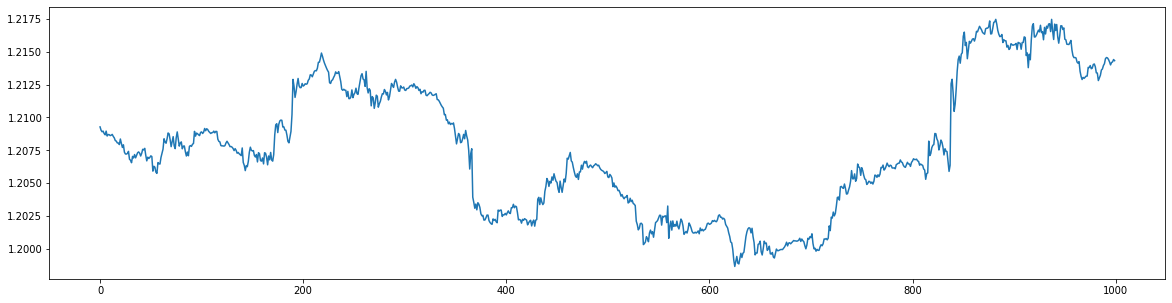

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(close_values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() #正規化
scaler = mms.fit(close_values)
close_values_norm = scaler.transform(close_values)
print(close_values_norm)

[[0.56473095]
 [0.55141183]
 [0.54501865]
 [0.54768247]
 [0.5380927 ]
 [0.53276505]
 [0.54768247]
 [0.52797017]
 [0.53383058]
 [0.53329782]
 [0.52956846]
 [0.53116676]
 [0.53436335]
 [0.52637187]
 [0.52051145]
 [0.50932339]
 [0.50719233]
 [0.49973362]
 [0.49973362]
 [0.49334044]
 [0.51571657]
 [0.49760256]
 [0.48161961]
 [0.49227491]
 [0.46244006]
 [0.45498135]
 [0.45498135]
 [0.45711241]
 [0.46563665]
 [0.43367075]
 [0.4299414 ]
 [0.41981886]
 [0.44539158]
 [0.4389984 ]
 [0.45285029]
 [0.43953117]
 [0.4496537 ]
 [0.460309  ]
 [0.46350559]
 [0.45817794]
 [0.44698988]
 [0.45764518]
 [0.4741609 ]
 [0.47202983]
 [0.47789025]
 [0.45018647]
 [0.42727757]
 [0.44219499]
 [0.43686734]
 [0.44112946]
 [0.44752264]
 [0.44485882]
 [0.3857219 ]
 [0.4054342 ]
 [0.40170485]
 [0.38145978]
 [0.37666489]
 [0.42035162]
 [0.41555674]
 [0.41449121]
 [0.44112946]
 [0.45711241]
 [0.47469366]
 [0.5167821 ]
 [0.50399574]
 [0.49866809]
 [0.5167821 ]
 [0.54022376]
 [0.53649441]
 [0.51305274]
 [0.4848162 ]
 [0.50

In [ ]:
import more_itertools
import numpy as np

train_data = np.array(list(more_itertools.windowed(close_values_norm[:-1], 100)))
train_target = np.array(close_values_norm[100:])

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(LSTM(300))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss="mean_squared_error", optimizer='adam')

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", mode="auto", patience=0)
model.fit(train_data, train_target, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
2/2 [==============================] - 9s 3s/step - loss: 0.2086 - val_loss: 0.0722
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 0.0251 - val_loss: 0.0369
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.0149 - val_loss: 0.0136
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 0.0066 - val_loss: 0.0364


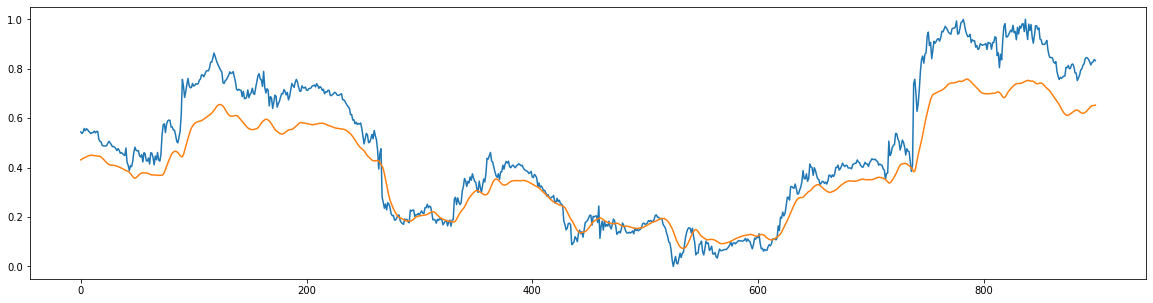

In [ ]:
pred_target = model.predict(train_data)
plt.figure(figsize=(20, 5))
plt.plot(train_target)
plt.plot(pred_target)
plt.show(close_values)
#オレンジが予測結果

In [ ]:
# 購入手順
#1.機械学習（今回はM1でデータは5000件）
import oandapyV20.endpoints.instruments as instruments
from sklearn.preprocessing import MinMaxScaler
import more_itertools
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping

params = {
  "count": 5000,
  "granularity": "M1"
}

r = instruments.InstrumentsCandles(instrument="EUR_USD", params=params)


close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))

mms = MinMaxScaler()
scaler = mms.fit(close_values)
close_values_norm = scaler.transform(close_values)

train_data = np.array(list(more_itertools.windowed(close_values_norm[:-1], 100)))
train_target = np.array(close_values_norm[100:])

model = Sequential()
model.add(LSTM(300))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss="mean_squared_error", optimizer='adam')

early_stopping = EarlyStopping(monitor="val_loss", mode="auto", patience=0)
model.fit(train_data, train_target, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 29s 3s/step - loss: 0.1531 - val_loss: 0.0254
Epoch 2/10
8/8 [==============================] - 25s 3s/step - loss: 0.0117 - val_loss: 0.0073
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.0044 - val_loss: 0.0047
Epoch 4/10
8/8 [==============================] - 25s 3s/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.0011 - val_loss: 8.4138e-04
Epoch 6/10
8/8 [==============================] - 29s 4s/step - loss: 4.9028e-04 - val_loss: 2.0328e-04
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 2.9525e-04 - val_loss: 6.1921e-05
Epoch 8/10
8/8 [==============================] - 26s 3s/step - loss: 2.5735e-04 - val_loss: 8.8351e-05


In [ ]:
#トレード
import oandapyV20.endpoints.orders as orders

#予測する対象を新しく取得
params = {
  "count": 500,
  "granularity": "M1"
}

r = instruments.InstrumentsCandles(instrument="EUR_USD", params=params)
close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))

close_values_norm = scaler.transform(close_values)
latest_data = np.array(list([close_values_norm])) #正規化されたデータ群

predict_price = model.predict(latest_data)
next_price = scaler.inverse_transform(predict_price)[0][0] #正規化されたデータ群を元に戻す

#トレード
units = '10000' if close_values[-1] <= next_price else '-10000'

order_params = {
     "order": {
        "units": units,
        "instrument": "EUR_USD",
        "type": "MARKET",
        "positionFill": "DEFAULT",
        "takeProfitOnFill": {
            "price": str(round(next_price, 3))
        }
    }
}

r = orders.OrderCreate(account_id, data=order_params)
client.request(r)

{'lastTransactionID': '14',
 'orderCreateTransaction': {'accountID': '101-009-19240202-001',
  'batchID': '12',
  'id': '12',
  'instrument': 'EUR_USD',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER',
  'requestID': '60840947418467524',
  'takeProfitOnFill': {'price': '1.21400', 'timeInForce': 'GTC'},
  'time': '2021-05-11T05:19:06.055418091Z',
  'timeInForce': 'FOK',
  'type': 'MARKET_ORDER',
  'units': '-10000',
  'userID': 19240202},
 'orderFillTransaction': {'accountBalance': '3000000.0000',
  'accountID': '101-009-19240202-001',
  'baseFinancing': '0',
  'batchID': '12',
  'commission': '0.0000',
  'financing': '0.0000',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '1.21437'}],
   'bids': [{'liquidity': '250000', 'price': '1.21432'}],
   'closeoutAsk': '1.21442',
   'closeoutBid': '1.21428',
   'timestamp': '2021-05-11T05:19:01.374066429Z'},
  'fullVWAP': '1.21432',
  'gainQuoteHomeConversionFactor': '108.614336',
  'guaranteedExecutionFee': '0.0000',
  'half